In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import shutil
from datetime import datetime
import tensorflow as tf
import ftplib

# State Data

In [2]:
api_url_data = 'https://api.covid19india.org/data.json'
r_data = requests.get(api_url_data)
data_time_series = r_data.json()

In [3]:
data_time_series.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [4]:
state_data = data_time_series.get('statewise')

In [5]:
state_list = []
confirmed_list = []
recovered_list = []
deaths_list = []

deltaconfirmed_list = []
deltarecovered_list = []
deltadeaths_list = []

lastupdatedtime_list = []


for j in range(len(state_data)):
    state = state_data[j].get('state')
    
    confirmed = state_data[j].get('confirmed')        
    recovered = state_data[j].get('recovered')
    deaths = state_data[j].get('deaths')
    
    deltaconfirmed = state_data[j].get('deltaconfirmed')
    deltarecovered = state_data[j].get('deltarecovered')
    deltadeaths = state_data[j].get('deltadeaths')
    
    lastupdatedtime = state_data[j].get('lastupdatedtime')
    
    if confirmed != '0':
        state_list.append(state)
        
        confirmed_list.append(confirmed)
        recovered_list.append(recovered)
        deaths_list.append(deaths)
        
        deltaconfirmed_list.append(deltaconfirmed)
        deltarecovered_list.append(deltarecovered)
        deltadeaths_list.append(deltadeaths)

        lastupdatedtime_list.append(lastupdatedtime)

In [6]:
confirmed_list = np.array(confirmed_list, dtype = int)
recovered_list = np.array(recovered_list, dtype = int)
deaths_list = np.array(deaths_list, dtype = int)

active = np.subtract(confirmed_list, np.add(recovered_list, deaths_list))
death_rate = np.divide(deaths_list, confirmed_list)*100
recovery_rate = np.divide(recovered_list, confirmed_list)*100

death_rate_list = []
recovery_rate_list = []

for s in death_rate:
    s = round(s,1)
    death_rate_list = np.append(death_rate_list, s)
for p in recovery_rate:
    p = round(p,1)
    recovery_rate_list = np.append(recovery_rate_list, p)

In [7]:
state_data = {'State':state_list[1:],'Confirmed':confirmed_list[1:], 'Active':active[1:], 'Recovered':recovered_list[1:], 'Deaths':deaths_list[1:], 'Recovery Rate(%)':recovery_rate_list[1:], 'Death Rate(%)':death_rate_list[1:], 'Last Updated':lastupdatedtime_list[1:]}
df_state_data = pd.DataFrame(state_data)
df_state_data.to_csv('State_data.csv')
df_state_data.to_html('State_data.html', border=0, justify = 'left', index = False, table_id = "state_data_table")
df_state_data

,State,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%),Last Updated
0,Maharashtra,22171,17140,4199,832,18.9,3.8,10/05/2020 23:03:23
1,Gujarat,8195,5157,2545,493,31.1,6.0,10/05/2020 20:42:25
2,Tamil Nadu,7204,5198,1959,47,27.2,0.7,10/05/2020 18:42:24
3,Delhi,6923,4781,2069,73,29.9,1.1,09/05/2020 18:23:08
4,Rajasthan,3898,1537,2253,108,57.8,2.8,11/05/2020 10:03:23
5,Madhya Pradesh,3614,1723,1676,215,46.4,5.9,10/05/2020 20:33:28
6,Uttar Pradesh,3467,1735,1653,79,47.7,2.3,10/05/2020 23:02:23
7,Andhra Pradesh,1980,1010,925,45,46.7,2.3,09/05/2020 16:37:13
8,West Bengal,1939,1337,417,185,21.5,9.5,10/05/2020 20:02:28
9,Punjab,1823,1626,166,31,9.1,1.7,10/05/2020 18:52:24


# Case Time Plot:

In [8]:
time = data_time_series.get('cases_time_series')

In [9]:
date_list = []
dailyconfirmed_list = []
dailydeceased_list = []
dailyrecovered_list = []

totalconfirmed_list = []
totaldeceased_list = []
totalrecovered_list = []
t = 0
for t in range(len(time)):
    
    date = time[t].get('date')
    date_list.append(date)
    
    dailyconfirmed = time[t].get('dailyconfirmed')
    dailyconfirmed_list.append(dailyconfirmed)
    
    dailydeceased = time[t].get('dailydeceased')
    dailydeceased_list.append(dailydeceased)
    
    dailyrecovered = time[t].get('dailyrecovered')
    dailyrecovered_list.append(dailyrecovered)
    
    totalconfirmed = time[t].get('totalconfirmed')
    totalconfirmed_list.append(totalconfirmed)
    
    totalrecovered = time[t].get('totalrecovered')
    totalrecovered_list.append(totalrecovered)
    
    totaldeceased = time[t].get('totaldeceased')
    totaldeceased_list.append(totaldeceased)

In [10]:
total_data = {'Confirmed':str(confirmed_list[0]) + ' (+' + str(deltaconfirmed_list[0]) + ')', 'Active':active[0], 'Recovered':str(recovered_list[0]) + ' (+' + str(deltarecovered_list[0]) + ')', 'Deaths':str(deaths_list[0]) + ' (+' + str(deltadeaths_list[0]) + ')', 'Recovery Rate(%)':recovery_rate_list[0], 'Death Rate(%)':death_rate_list[0]}
df_total_data = pd.DataFrame(total_data, index=[0])
df_total_data.to_csv('total_data.csv')
df_total_data.to_html('total_data.html', border=0, justify = 'center', index=False)
df_total_data

,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%)
0,67270 (+98),44076,20981 (+12),2213 (+0),31.2,3.3


In [11]:
day_range = 28

daily_data = {'Daily Confirmations':dailyconfirmed_list[-day_range:], 'Daily Recoveries':dailyrecovered_list[-day_range:], 'Daily Deaths':dailydeceased_list[-day_range:], 'Total Confirmations':totalconfirmed_list[-day_range:], 'Total Recoveries':totalrecovered_list[-day_range:], 'Total Deaths':totaldeceased_list[-day_range:]}
df_daily_data = pd.DataFrame(daily_data, index = [date_list[-day_range:]])
df_daily_data.to_csv('daily_data.csv')
df_daily_data.to_html('daily_data.html', border=0, justify = 'left')
df_daily_data

,Daily Confirmations,Daily Recoveries,Daily Deaths,Total Confirmations,Total Recoveries,Total Deaths
13 April,1243,112,27,10454,1198,359
14 April,1031,167,37,11485,1365,396
15 April,886,144,27,12371,1509,423
16 April,1061,258,26,13432,1767,449
17 April,922,273,38,14354,2040,487
18 April,1371,426,35,15725,2466,522
19 April,1580,388,38,17305,2854,560
20 April,1239,419,33,18544,3273,593
21 April,1537,703,53,20081,3976,646
22 April,1292,394,36,21373,4370,682


In [12]:
totalconfirmed_list = np.array(totalconfirmed_list, dtype=int)
totalrecovered_list = np.array(totalrecovered_list, dtype=int)
totaldeceased_list = np.array(totaldeceased_list, dtype=int)

dailyconfirmed_list = np.array(dailyconfirmed_list, dtype=int)
dailyrecovered_list = np.array(dailyrecovered_list, dtype=int)
dailydeceased_list = np.array(dailydeceased_list, dtype=int)

In [13]:
date_list_splitted = []
for i in date_list:
    date_splitted = i[0:2]
    date_list_splitted.append(date_splitted)

Text(0.5, 0.91, "Real Time Trend analysis of Covid'19 in Non-Uniform Scale")

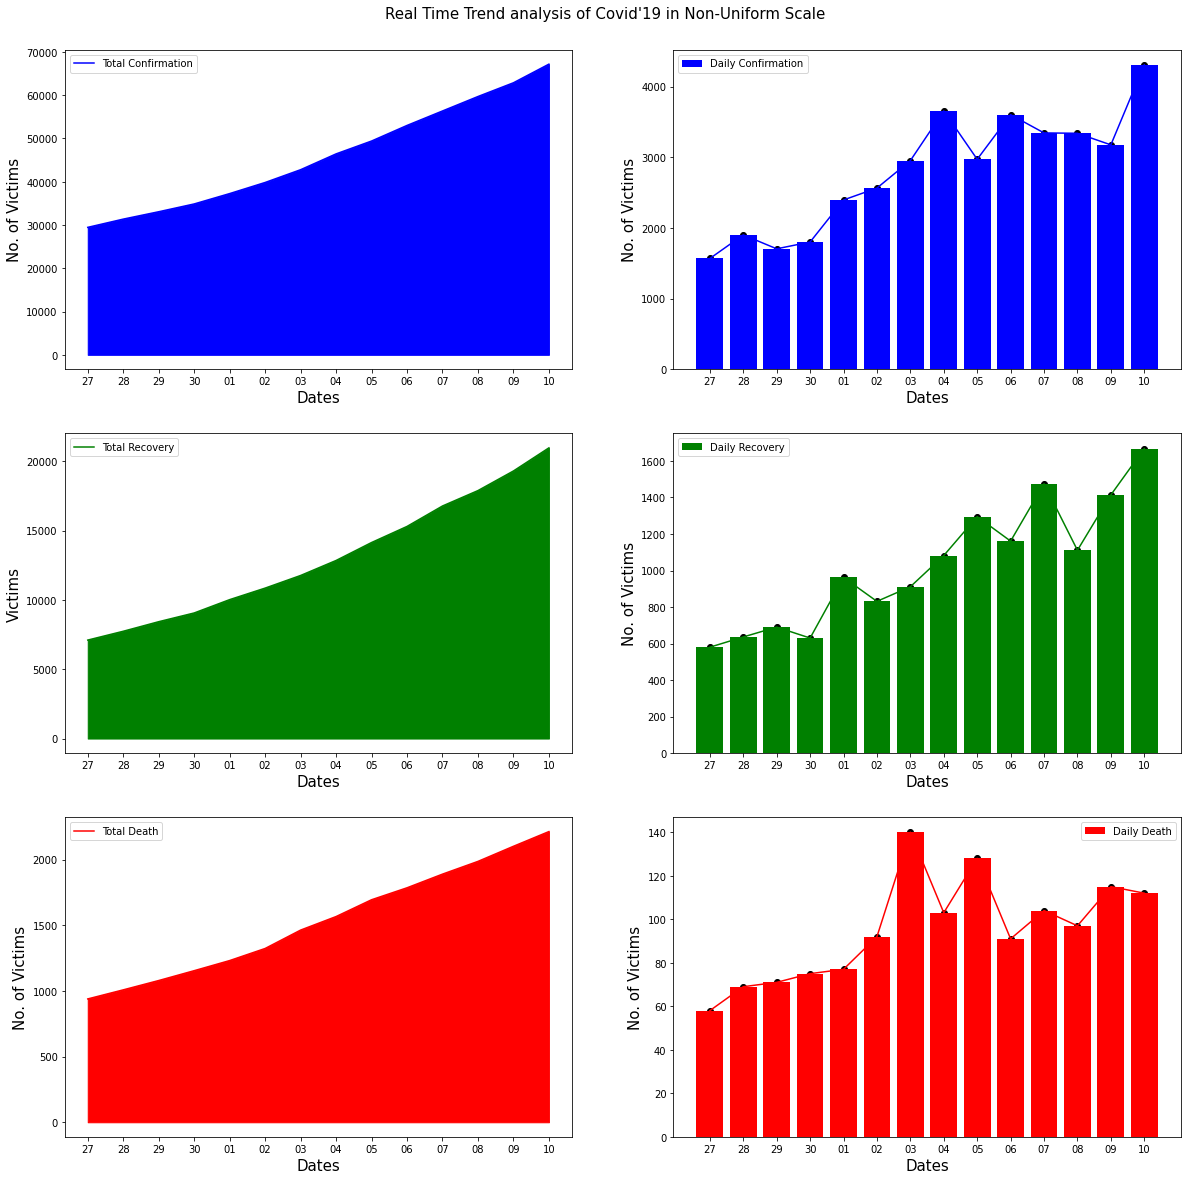

In [14]:
day_range = 14

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.plot(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
# plt.scatter(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,2)
plt.bar(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.plot(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.scatter(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,3)
plt.plot(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
# plt.scatter(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,4)
plt.bar(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.scatter(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,5)
plt.plot(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red', label='Total Death')
# plt.scatter(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,6)
plt.bar(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red', label='Daily Death')
plt.plot(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red')
plt.scatter(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailydeceased_list[-day_range:], color='black')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.suptitle("Real Time Trend analysis of Covid'19 in Non-Uniform Scale", fontsize=15, x=0.5,y=0.91)

In [15]:
day_range_train = 62

x_conf = totalconfirmed_list[day_range_train:]
x_rec = totalrecovered_list[day_range_train:]
x_det = totaldeceased_list[day_range_train:]

print(date_list[day_range_train])
print(x_conf)
print(x_rec)
print(x_det)
print(len(x_conf))

01 April 
[ 2059  2545  3105  3684  4293  4777  5350  5915  6728  7599  8453  9211
 10454 11485 12371 13432 14354 15725 17305 18544 20081 21373 23040 24448
 26283 27890 29458 31360 33065 34866 37262 39826 42778 46434 49405 53007
 56351 59690 62865 67172]
[  169   191   230   286   329   394   469   565   635   786   972  1086
  1198  1365  1509  1767  2040  2466  2854  3273  3976  4370  5012  5496
  5938  6523  7103  7739  8429  9059 10021 10852 11763 12845 14140 15301
 16776 17887 19301 20969]
[  53   69   83   96  118  134  161  181  227  249  290  332  359  396
  423  449  487  522  560  593  646  682  722  781  825  881  939 1008
 1079 1154 1231 1323 1463 1566 1694 1785 1889 1986 2101 2213]
40


Text(0.5, 1.0, 'Death')

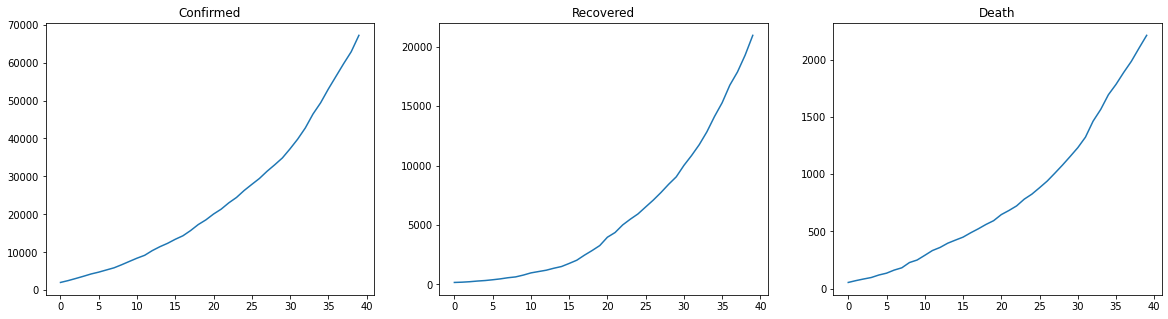

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(x_conf)
plt.title('Confirmed')

plt.subplot(1,3,2)
plt.plot(x_rec)
plt.title('Recovered')

plt.subplot(1,3,3)
plt.plot(x_det)
plt.title('Death')

In [17]:
pd_pred_report = pd.read_csv('PRED_REPORTS.csv')
pd_pred_report

,Unnamed: 0,pred_list_conf,pred_list_rec,pred_list_det,conf_loss,rec_loss,det_loss
0,0,71062,22507,2387,67875.265625,8399.794922,127.897949
1,1,71650,22603,2353,54235.953125,7485.978027,127.160988
2,2,70722,22278,2351,57910.257812,9128.368164,119.720436
3,3,70388,22247,2335,56171.769531,9743.183594,129.933990
4,4,70234,22811,2374,61187.714844,7583.296387,117.620750


In [18]:
pd_pred_list_conf = pd_pred_report['pred_list_conf'].values
pd_pred_list_rec = pd_pred_report['pred_list_rec'].values
pd_pred_list_det = pd_pred_report['pred_list_det'].values

pd_conf_loss = pd_pred_report['conf_loss'].values
pd_rec_loss = pd_pred_report['rec_loss'].values
pd_det_loss = pd_pred_report['det_loss'].values

In [19]:
i,j,k,l,m,n = 0,0,0,0,0,0

pred_list_conf = []
pred_list_rec = []
pred_list_det = []

conf_loss = []
rec_loss = []
det_loss = []

for i in pd_pred_list_conf:
    pred_list_conf.append(i)
    
for j in pd_pred_list_rec:
    pred_list_rec.append(j)
    
for k in pd_pred_list_det:
    pred_list_det.append(k)
    
for l in pd_conf_loss:
    conf_loss.append(l)
    
for m in pd_rec_loss:
    rec_loss.append(m)
    
for n in pd_det_loss:
    det_loss.append(n)

In [20]:
window_size = 6

dataset = tf.data.Dataset.from_tensor_slices(x_conf)
dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=len(x_conf))
dataset = dataset.batch(1).prefetch(1)

for x,y in dataset:
    print(x.numpy(), y.numpy())

[[34866 37262 39826 42778 46434 49405]] [[53007]]
[[ 8453  9211 10454 11485 12371 13432]] [[14354]]
[[27890 29458 31360 33065 34866 37262]] [[39826]]
[[21373 23040 24448 26283 27890 29458]] [[31360]]
[[23040 24448 26283 27890 29458 31360]] [[33065]]
[[12371 13432 14354 15725 17305 18544]] [[20081]]
[[26283 27890 29458 31360 33065 34866]] [[37262]]
[[24448 26283 27890 29458 31360 33065]] [[34866]]
[[20081 21373 23040 24448 26283 27890]] [[29458]]
[[2059 2545 3105 3684 4293 4777]] [[5350]]
[[ 6728  7599  8453  9211 10454 11485]] [[12371]]
[[18544 20081 21373 23040 24448 26283]] [[27890]]
[[10454 11485 12371 13432 14354 15725]] [[17305]]
[[3105 3684 4293 4777 5350 5915]] [[6728]]
[[4293 4777 5350 5915 6728 7599]] [[8453]]
[[33065 34866 37262 39826 42778 46434]] [[49405]]
[[42778 46434 49405 53007 56351 59690]] [[62865]]
[[5350 5915 6728 7599 8453 9211]] [[10454]]
[[2545 3105 3684 4293 4777 5350]] [[5915]]
[[14354 15725 17305 18544 20081 21373]] [[23040]]
[[46434 49405 53007 56351 59690 62

In [21]:
train = str(input("Do you want to train? "))

if train.upper() == 'Y':
    pred_list_conf = []
    pred_list_rec = []
    pred_list_det = []
    
    conf_loss = []
    rec_loss = []
    det_loss = []

    window_size = 6
    i = 0
    for i in range(5):
        dataset = tf.data.Dataset.from_tensor_slices(x_conf)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_conf))
        dataset = dataset.batch(1).prefetch(1)

        callback = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 5000, verbose=1, mode = 'min', restore_best_weights = True),
                    tf.keras.callbacks.ModelCheckpoint('best_model_conf.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        
        loss = min(history.history['loss'])
        conf_loss.append(loss)
        
        pred_daily = model.predict(x_conf[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_conf.append(pred_daily)

    j = 0
    for j in range(5):
        dataset = tf.data.Dataset.from_tensor_slices(x_rec)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_rec))
        dataset = dataset.batch(1).prefetch(1)

        callback = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 5000, verbose=1, mode = 'min', restore_best_weights = True),
                    tf.keras.callbacks.ModelCheckpoint('best_model_rec.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        
        loss = min(history.history['loss'])
        rec_loss.append(loss)
        
        pred_daily = model.predict(x_rec[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_rec.append(pred_daily)

    k = 0
    for k in range(5):
        dataset = tf.data.Dataset.from_tensor_slices(x_det)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_det))
        dataset = dataset.batch(1).prefetch(1)

        callback = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 5000, verbose=1, mode = 'min', restore_best_weights = True),
                    tf.keras.callbacks.ModelCheckpoint('best_model_det.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        
        loss = min(history.history['loss'])
        det_loss.append(loss)
        
        pred_daily = model.predict(x_det[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_det.append(pred_daily)
        
elif train.upper() == 'N':
    pass

Do you want to train? n


In [22]:
print(conf_loss)
print(rec_loss)
print(det_loss)

[67875.265625, 54235.953125, 57910.2578125, 56171.76953125, 61187.71484375]
[8399.794921875, 7485.97802734375, 9128.3681640625, 9743.18359375, 7583.29638671875]
[127.89794921875, 127.1609878540039, 119.7204360961914, 129.93399047851562, 117.6207504272461]


In [23]:
print(pred_list_conf)
print(pred_list_rec)
print(pred_list_det)

[71062, 71650, 70722, 70388, 70234]
[22507, 22603, 22278, 22247, 22811]
[2387, 2353, 2351, 2335, 2374]


In [24]:
pred_reports = {"pred_list_conf":pred_list_conf, "pred_list_rec":pred_list_rec, "pred_list_det":pred_list_det, "conf_loss":conf_loss, "rec_loss":rec_loss, "det_loss":det_loss}
df_pred_reports = pd.DataFrame(pred_reports)
df_pred_reports.to_csv('PRED_REPORTS.csv')

In [25]:
pred_conf_lmin = pred_list_conf[conf_loss.index(min(conf_loss))]
pred_rec_lmin = pred_list_rec[rec_loss.index(min(rec_loss))]
pred_det_lmin = pred_list_det[det_loss.index(min(det_loss))]
pred_act_lmin = pred_conf_lmin - (pred_rec_lmin + pred_det_lmin)

In [26]:
pred_conf_max = pred_conf_lmin + pred_conf_lmin//200
pred_rec_max = pred_rec_lmin + pred_rec_lmin//200
pred_det_max = pred_det_lmin + pred_det_lmin//200
pred_act_max = pred_act_lmin + pred_act_lmin//200

In [27]:
pred_conf_min = pred_conf_lmin - pred_conf_lmin//200
pred_rec_min = pred_rec_lmin - pred_rec_lmin//200
pred_det_min = pred_det_lmin - pred_det_lmin//200
pred_act_min = pred_act_lmin - pred_act_lmin//200

In [28]:
print(x_conf, pred_conf_max, pred_conf_min)
print(x_rec, pred_rec_max, pred_rec_min)
print(x_det, pred_det_max, pred_det_min)

[ 2059  2545  3105  3684  4293  4777  5350  5915  6728  7599  8453  9211
 10454 11485 12371 13432 14354 15725 17305 18544 20081 21373 23040 24448
 26283 27890 29458 31360 33065 34866 37262 39826 42778 46434 49405 53007
 56351 59690 62865 67172] 72008 71292
[  169   191   230   286   329   394   469   565   635   786   972  1086
  1198  1365  1509  1767  2040  2466  2854  3273  3976  4370  5012  5496
  5938  6523  7103  7739  8429  9059 10021 10852 11763 12845 14140 15301
 16776 17887 19301 20969] 22716 22490
[  53   69   83   96  118  134  161  181  227  249  290  332  359  396
  423  449  487  522  560  593  646  682  722  781  825  881  939 1008
 1079 1154 1231 1323 1463 1566 1694 1785 1889 1986 2101 2213] 2385 2363


In [29]:
print(pred_conf_max, pred_rec_max, pred_det_max, pred_act_max)

72008 22716 2385 46906


In [30]:
print(pred_conf_min, pred_rec_min, pred_det_min, pred_act_min)

71292 22490 2363 46440


In [31]:
pred = pred_conf_lmin-x_conf[-1]
pred_high = pred_conf_max-x_conf[-1]
pred_low = pred_conf_min-x_conf[-1]

print(pred_high)
print(pred)
print(pred_low)

4836
4478
4120


In [32]:
if pred_conf_min < pred_conf_max:
    pred_conf_low = pred_conf_min
    pred_conf_high = pred_conf_max
else:
    pred_conf_low = pred_conf_max
    pred_conf_high = pred_conf_min
    
print(pred_conf_low, pred_conf_high)

71292 72008


In [33]:
if pred_act_min < pred_act_max:
    pred_act_low = pred_act_min
    pred_act_high = pred_act_max
else:
    pred_act_low = pred_act_max
    pred_act_high = pred_act_min
    
print(pred_act_low, pred_act_high)

46440 46906


In [34]:
if pred_rec_min < pred_rec_max:
    pred_rec_low = pred_rec_min
    pred_rec_high = pred_rec_max
else:
    pred_rec_low = pred_rec_max
    pred_rec_high = pred_rec_min
    
print(pred_rec_low, pred_rec_high)

22490 22716


In [35]:
if pred_det_min < pred_det_max:
    pred_det_low = pred_det_min
    pred_det_high = pred_det_max
else:
    pred_det_low = pred_det_max
    pred_det_high = pred_det_min
    
print(pred_det_low, pred_det_high)

2363 2385


In [36]:
upload = str(input('Do you want to upload the prediction? '))

Do you want to upload the prediction? n


# ICMR Reports

In [37]:
tested = data_time_series.get('tested')

In [38]:
totalsamplestested_list = []
report_date_list = []

for i in range(len(tested)):
    report_date = tested[i].get('updatetimestamp')
    report_date = report_date[0:10]
    report_date_list.append(report_date)
    
    totalsamplestested = tested[i].get('totalsamplestested')
    totalsamplestested_list.append(totalsamplestested)

In [39]:
dt_list_total = report_date_list[-14:]
tst_list_total = np.array(totalsamplestested_list[-14:], dtype=int)

In [40]:
dt_list_daily = report_date_list[-14:-1]

i = 0
tst_list_daily = []
for i in range(len(tst_list_total)):
    tst_daily = tst_list_total[i] - tst_list_total[i-1]
    tst_list_daily.append(tst_daily)

In [41]:
tst_list_daily = np.array(tst_list_daily[1:])

In [42]:
print(tst_list_total)
print(dt_list_total)
print()
print(tst_list_daily)
print(dt_list_daily)

[ 716733  770764  830201  902654  976363 1046450 1107233 1191946 1276781
 1357413 1437788 1523213 1609037 1673688]
['28/04/2020', '29/04/2020', '30/04/2020', '01/05/2020', '02/05/2020', '03/05/2020', '04/05/2020', '05/05/2020', '06/05/2020', '07/05/2020', '08/05/2020', '09/05/2020', '10/05/2020', '11/05/2020']

[54031 59437 72453 73709 70087 60783 84713 84835 80632 80375 85425 85824
 64651]
['28/04/2020', '29/04/2020', '30/04/2020', '01/05/2020', '02/05/2020', '03/05/2020', '04/05/2020', '05/05/2020', '06/05/2020', '07/05/2020', '08/05/2020', '09/05/2020', '10/05/2020']


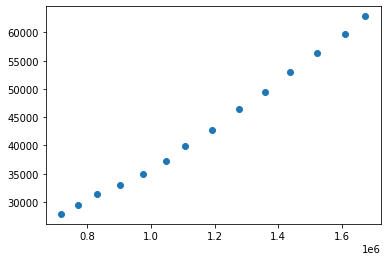

In [43]:
cnf_list = totalconfirmed_list[-15:-1]
plt.scatter(tst_list_total, cnf_list)

In [44]:
ICMR_data = {'Total Samples Tested by ICMR':tst_list_total}
df_ICMR_data = pd.DataFrame(ICMR_data, index = dt_list_total)
df_ICMR_data.to_csv('ICMR_data.csv')
df_ICMR_data.to_html('ICMR_data.html', border=0, justify = 'center')

### Future Prediction using ICMR Data

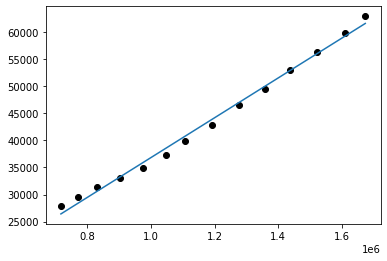

In [45]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

popt, pcov = curve_fit(func, tst_list_total, cnf_list)
a = popt[0]
b = popt[1]

m = len(tst_list_total)
theta_0 = np.multiply(b, np.ones(m))
theta_1 = np.multiply(a,np.ones(m))
hypothesis = np.add(np.multiply(tst_list_total, theta_1),theta_0)

plt.scatter(tst_list_total, cnf_list, color='black')
plt.plot(tst_list_total, hypothesis)

In [46]:
location = ['USA', 'Italy', 'Germany', 'South Korea']
test_world = [4003551, 1398024, 1728357, 563035]
conf_world = [799515, 181228, 147062, 10683]

In [47]:
y_pred = []
for items in test_world:
    pred = a*items + b
    y_pred.append(pred)

In [48]:
y_pred = np.array(y_pred, dtype=int)
y_pred

array([147018,  51421,  63541,  20786])

In [49]:
usa_vs_india_loc = ['USA', 'India']
usa_vs_india_conf = [conf_world[0], y_pred[0]]

italy_vs_india_loc = ['Italy', 'India']
italy_vs_india_conf = [conf_world[1], y_pred[1]]

germany_vs_india_loc = ['Germany', 'India']
germany_vs_india_conf = [conf_world[2], y_pred[2]]

sk_vs_india_loc = ['South Korea', 'India']
sk_vs_india_conf = [conf_world[3], y_pred[3]]

# Resources

In [50]:
api_url_resources = 'https://api.covid19india.org/resources/resources.json'
r_resources_ = requests.get(api_url_resources)
resources = r_resources_.json()

In [51]:
resource_list = resources.get('resources')

In [52]:
covid_labs = []
i = 0
for i in range(len(resource_list)):
    if resource_list[i].get('category') == 'CoVID-19 Testing Lab':
        covid_labs.append(resource_list[i])

In [53]:
state_list_lab = []
city_list = []
nameoftheorganisation_list = []
phonenumber_list = []
contact_list = []
descriptionandorserviceprovided_list = []

i = 0 
for i in range(len(covid_labs)):
    state = covid_labs[i].get('state')
    state_list_lab.append(state)
    
    city = covid_labs[i].get('city')
    city_list.append(city)
    
    nameoftheorganisation = covid_labs[i].get('nameoftheorganisation')
    nameoftheorganisation_list.append(nameoftheorganisation)
    
    contact = covid_labs[i].get('contact')
    contact_list.append(contact)

In [54]:
test_lab = {'State':state_list_lab, 'City':city_list, 'Organisation':nameoftheorganisation_list}
df_test_lab = pd.DataFrame(test_lab)
df_test_lab.to_csv('test_lab.csv')
df_test_lab.to_html('test_lab.html', border=0, index=False, justify = 'left', table_id = "resources_table")
df_test_lab

,State,City,Organisation
0,Andaman & Nicobar,Port Blair,Regional Medical Research Centre (ICMR)
1,Andhra Pradesh,Kakinada,Rangaraya Medical College
2,Andhra Pradesh,Vijayawada,Sidhartha Medical College
3,Assam,Dibrugarh,"Regional Medical Research Center, NE Region"
4,Assam,Guwahati,Gauhati Medical College
...,...,...,...
161,West Bengal,Siliguri,North Bengal Medical College
162,West Bengal,Kolkata,Institute of Post Graduate Medical Education &...
163,West Bengal,Kolkata,National Institute of Cholera & Enteric Diseases
164,West Bengal,Kolkata,Chittaranjan National Cancer Institute


# index.html

In [55]:
date_list_chart = []
totalconfirmed_list_chart = []
totalrecovered_list_chart = []
totaldeceased_list_chart = []
dailyconfirmed_list_chart = []
dailyrecovered_list_chart = []
dailydeceased_list_chart = []

i,j,k,l,m,n,o = 0,0,0,0,0,0,0

for i in date_list:
    date_list_chart.append(i)
    
for j in totalconfirmed_list:
    totalconfirmed_list_chart.append(j)

for k in totalrecovered_list:
    totalrecovered_list_chart.append(k)
    
for l in totaldeceased_list:
    totaldeceased_list_chart.append(l)
    
for m in dailyconfirmed_list:
    dailyconfirmed_list_chart.append(m)
    
for n in dailyrecovered_list:
    dailyrecovered_list_chart.append(n)
    
for o in dailydeceased_list:
    dailydeceased_list_chart.append(o)

In [56]:
for i in range(28):
    print("'rgba(255,0,0,0)',")

'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',
'rgba(255,0,0,0)',


In [57]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")
date_time = now.strftime("%d-%m-%Y at %H:%M:%S")

index = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid-19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item active">
                <a class="nav-link" href="index"><b>Home <i class="fas fa-home"></i></b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="trendAnalysis"><b>Trend Analysis</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="futurePrediction"><b>Future Prediction</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="helpfulResources"><b>Helpful Resources</b></a>
            </li>
        </ul>
    </div>
</nav>

<div class="text-center">
    <br>
    <h1 class="text-center"><b>Insights of Covid-19 Pandemic in India</b></h1>
    <p class="text-center">
        Live information about Novel Corona Virus spread in India.
        <br>
        Check out the <a href="https://telegra.ph/Data-Sources-for-Covidtracker-indiaml-04-05" target="_blank" rel="noopener">data sources</a> for this website.
        <br>
        Last updated on """ + str(date_time) + """
        <br>
        <br>
        <br>
        <br>
    </p>
</div>

<div class="container">
    <div class="row justify-content-center">
        
        <div class="col-lg-4 col mb-3">
            <div class="card border-0">
                  <div class="text-primary">
                    <div class="card-body">
                      <h6 class="card-title"><b>Total <br> Confirmed</b></h6>
                      <h3 class="card-text"><b>""" + str(confirmed_list[0]) + """</b></h3>
                      <h6 class="card-text"> +""" + str(deltaconfirmed_list[0]) + """</h6>
                    </div>
                  </div>
            </div>
        </div>
    
        <div class="col-lg-8 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_3" width="400" height="150""></canvas>
            <script>
            var ctx_3 = document.getElementById('myChart_3').getContext('2d');
            var mixedChart_3 = new Chart(ctx_3, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Daily Confirmations',
                        data: """ + str(dailyconfirmed_list_chart[-28:]) + """,
                        backgroundColor: [
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                            'rgba(0,0,255,0)',
                        ],
                    },{
                        label: '',
                        data: """ + str(dailyconfirmed_list_chart[-28:]) + """,
                        borderColor: "rgba(0,0,255,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-28:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-4 col mb-3">
            <div class="card border-0">
                  <div class="text-success">
                    <div class="card-body">
                      <h6 class="card-title"><b>Total <br> Recovered</b></h6>
                      <h3 class="card-text"><b>""" + str(recovered_list[0]) + """</b></h3>
                      <h6 class="card-text"> +""" + str(deltarecovered_list[0]) + """</h6>
                    </div>
                  </div>
            </div>
        </div>

        
        <div class="col-lg-8 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_31" width="400" height="150""></canvas>
            <script>
            var ctx_31 = document.getElementById('myChart_31').getContext('2d');
            var mixedChart_31 = new Chart(ctx_31, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Daily Recoveries',
                        data: """ + str(dailyrecovered_list_chart[-28:]) + """,
                        backgroundColor: [
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                            'rgba(92,184,92,0)',
                        ],
                    },{
                        label: '',
                        data: """ + str(dailyrecovered_list_chart[-28:]) + """,
                        borderColor: "rgba(92,184,92,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-28:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-4 col mb-3">
            <div class="card border-0">
                  <div class="text-danger">
                    <div class="card-body">
                      <h6 class="card-title"><b>Total <br> Deceased</b></h6>
                      <h3 class="card-text"><b>""" + str(deaths_list[0]) + """</b></h3>
                      <h6 class="card-text"> +""" + str(deltadeaths_list[0]) + """</h6>
                    </div>
                  </div>
            </div>
        </div>
        
        <div class="col-lg-8 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_32" width="400" height="150""></canvas>
            <script>
            var ctx_32 = document.getElementById('myChart_32').getContext('2d');
            var mixedChart_32 = new Chart(ctx_32, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Daily Deaths',
                        data: """ + str(dailydeceased_list_chart[-28:]) + """,
                        backgroundColor: [
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                            'rgba(255,0,0,0)',
                        ],
                    },{
                        label: '',
                        data: """ + str(dailydeceased_list_chart[-28:]) + """,
                        borderColor: "rgba(255,0,0,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-28:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>

        
    </div>
</div>

<br>
<br>

<div class="container">
    <div class="row justify-content-center">

        <div class="col-lg-6 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Recovery Rate</b></h4>
                      <p class="card-text"><b>""" + str(recovery_rate_list[0]) + '%' + """</b></p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-6 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Death Rate</b></h4>
                      <p class="card-text"><b>""" + str(death_rate_list[0]) + '%' + """</b></p>
                    </div>
                  </div>
            </div>
        </div>
        
    </div>
</div>

<br>

<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank" rel="noopener">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

index_ = open("index.htm","w")
index_.write(index)
index_.close()

# trend.html

In [58]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")
date_time = now.strftime("%d-%m-%Y at %H:%M:%S")

intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item">
                <a class="nav-link" href="index"><b>Home</b></a>
            </li>
            <li class="nav-item active">
                <a class="nav-link" href="trendAnalysis"><b>Trend Analysis <i class="fas fa-chart-line"></i></b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="futurePrediction"><b>Future Prediction</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="helpfulResources"><b>Helpful Resources</b></a>
            </li>
        </ul>
    </div>
</nav>

<p class="text-center text-danger">
    <br>
    Please refresh the page to see the latest information
</p>

<p class="text-center">
    Last updated on """ + str(date_time) + """
</p>


<div class="container">
    <div class="row justify-content-center">
    
        <div class="col-lg-3 col mb-3">
            <div class="card bg-primary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Confirmed</b></h4>
                      <p class="card-text">""" + str(confirmed_list[0]) + ' (+' + str(deltaconfirmed_list[0]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Active</b></h4>
                      <p class="card-text">""" + str(active[0]) + """</p>
                    </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Recovered</b></h4>
                      <p class="card-text">""" + str(recovered_list[0]) + ' (+' + str(deltarecovered_list[0]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-3 col mb-3">
            <div class="card bg-secondary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Deceased</b></h4>
                      <p class="card-text">""" + str(deaths_list[0]) + ' (+' + str(deltadeaths_list[0]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>
    </div>
</div>


<br>
<br>
<h3 class="text-center">
    <b>Analysing Corona Virus spread in Different States</b>
</h3>

<br>
<div class="text-center">
  <input type="text" name="" id="state_data_search" placeholder=" Search by State" onkeyup="search()">
</div>
<br>

<div class="container mb-3">
<div class="table-responsive">
"""

intro_ = open("trend_intro.html","w")
intro_.write(intro)
intro_.close()

In [59]:
confirmed_list_chart = []

i = 0
for i in confirmed_list:
    confirmed_list_chart.append(i)

In [60]:
daily_data_intro = """
</div>
</div>

<script>
  const search = () =>{
    let filter = document.getElementById('state_data_search').value.toUpperCase();
    let resources_table = document.getElementById('state_data_table');
    let tr = resources_table.getElementsByTagName('tr');
    for(var i=0; i<tr.length; i++){
      let td = tr[i].getElementsByTagName('td')[0];
      if(td){
        let textvalue = td.textContent || td.innerHTML;
        if(textvalue.toUpperCase().indexOf(filter) > -1){
          tr[i].style.display = "";
        }
        else{
          tr[i].style.display = "none";
        }
        }
      }
    }
</script>

<br>
<br>

<h3 class="text-center">
    <b>Trend analysis of Corona Virus spread using the data of last 14 days</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

daily_data_intro_ = open('daily_data_intro.html', 'w')
daily_data_intro_.write(daily_data_intro)
daily_data_intro_.close()


In [61]:
chart_total = """
</div>
</div>

<br>
<br>

<h3 class="text-center">
    <b>Analysis of last 42 days</b>
</h3>

<br>

<div class="container">
    <div class="row justify-content-center">
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_3"></canvas>
            <script>
            var ctx_3 = document.getElementById('myChart_3').getContext('2d');
            var mixedChart_3 = new Chart(ctx_3, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Total Confirmations',
                        data: """ + str(totalconfirmed_list_chart[-42:]) + """,
                        barPercentage: 0.7,
                        backgroundColor: [
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                        ],
                    },{
                        label: '',
                        data: """ + str(totalconfirmed_list_chart[-42:]) + """,
                        borderColor: "rgba(0,0,255,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-42:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <canvas id="myChart_4"></canvas>
            <script>
            var ctx_4 = document.getElementById('myChart_4').getContext('2d');
            var mixedChart_4 = new Chart(ctx_4, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Daily Confirmations',
                        data: """ + str(dailyconfirmed_list_chart[-42:]) + """,
                        barPercentage: 0.7,
                        backgroundColor: [
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                            "rgba(0,0,255,1)",
                        ],
                    },{
                        label: '',
                        data: """ + str(dailyconfirmed_list_chart[-42:]) + """,
                        borderColor: "rgba(0,0,255,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-42:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <canvas id="myChart_31"></canvas>
            <script>
            var ctx_31 = document.getElementById('myChart_31').getContext('2d');
            var mixedChart_31 = new Chart(ctx_31, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Total Recoveries',
                        data: """ + str(totalrecovered_list_chart[-42:]) + """,
                        barPercentage: 0.7,
                        backgroundColor: [
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                        ],
                    },{
                        label: '',
                        data: """ + str(totalrecovered_list_chart[-42:]) + """,
                        borderColor: "rgba(92,184,92,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-42:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <canvas id="myChart_41"></canvas>
            <script>
            var ctx_41 = document.getElementById('myChart_41').getContext('2d');
            var mixedChart_41 = new Chart(ctx_41, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Daily Recoveries',
                        data: """ + str(dailyrecovered_list_chart[-42:]) + """,
                        barPercentage: 0.7,
                        backgroundColor: [
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                                "rgba(92,184,92,1)",
                        ],
                    },{
                        label: '',
                        data: """ + str(dailyrecovered_list_chart[-42:]) + """,
                        borderColor: "rgba(92,184,92,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-42:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <canvas id="myChart_32"></canvas>
            <script>
            var ctx_32 = document.getElementById('myChart_32').getContext('2d');
            var mixedChart_32 = new Chart(ctx_32, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Total Deaths',
                        data: """ + str(totaldeceased_list_chart[-42:]) + """,
                        barPercentage: 0.7,
                        backgroundColor: [
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                        ],
                    },{
                        label: '',
                        data: """ + str(totaldeceased_list_chart[-42:]) + """,
                        borderColor: "rgba(255,0,0,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-42:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <canvas id="myChart_42"></canvas>
            <script>
            var ctx_42 = document.getElementById('myChart_42').getContext('2d');
            var mixedChart_42 = new Chart(ctx_42, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Total Deaths',
                        data: """ + str(dailydeceased_list_chart[-42:]) + """,
                        barPercentage: 0.7,
                        backgroundColor: [
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                                "rgba(255,0,0,1)",
                        ],
                    },{
                        label: '',
                        data: """ + str(dailydeceased_list_chart[-42:]) + """,
                        borderColor: "rgba(255,0,0,1)",
                        type: 'line',
                        fill: false,
                        order: 1
                    }],
                    labels: """ + str(date_list_chart[-42:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
    </div>
</div>
<br>
"""

chart_total_ = open("chart_total.html","w")
chart_total_.write(chart_total)
chart_total_.close()

In [62]:
ICMR_report_data_intro = """
</div>
</div>

<br>
<br>
<h3 class="text-center">
    <b>Trend Analysis using the test reports of last 7 days from ICMR</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

ICMR_report_data_intro_ = open('ICMR_report_data_intro.html', 'w')
ICMR_report_data_intro_.write(ICMR_report_data_intro)
ICMR_report_data_intro_.close()

In [63]:
report_date_list_chart = []
totalsamplestested_list_chart = []
dt_list_daily_chart = []
totalsamplestested_daily_list_chart = []

i,j,k,l = 0,0,0,0

    
for i in tst_list_total:
    totalsamplestested_list_chart.append(i)
    
for j in dt_list_total:
    j = j[:-5]
    report_date_list_chart.append(j)
    
for k in dt_list_daily:
    k = k[:-5]
    dt_list_daily_chart.append(k)
    
for l in tst_list_daily:
    totalsamplestested_daily_list_chart.append(l)

In [82]:
icmr_stat_sample = """
</div>
</div>

<div class="container">
    <div class="row justify-content-center">
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_1"></canvas>
            <script>
            var ctx_1 = document.getElementById('myChart_1').getContext('2d');
            var mixedChart_1 = new Chart(ctx_1, {
                type: 'bar',
                data: {
                    labels: """ + str(report_date_list_chart) + """,
                    datasets: [{
                        label: 'Total Samples Tested',
                        data: """ + str(totalsamplestested_list_chart) + """,
                        borderColor: [
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                        ],
                        backgroundColor: [
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                        ],
                        borderWidth: 1,
                        fill: true
                    }]
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: 'Dates'
                            },
                            gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }

            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <canvas id="myChart_12"></canvas>
            <script>
            var ctx_12 = document.getElementById('myChart_12').getContext('2d');
            var mixedChart_12 = new Chart(ctx_12, {
                type: 'bar',
                data: {
                    labels: """ + str(dt_list_daily_chart) + """,
                    datasets: [{
                        label: 'Daily Samples Tested',
                        data: """ + str(totalsamplestested_daily_list_chart) + """,
                        borderColor: [
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                            'rgba(255,0,0,1)',
                        ],
                        backgroundColor: [
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                            'rgba(255, 0, 0, 0.3)',
                        ],
                        borderWidth: 1,
                        fill: true
                    }]
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: 'Dates'
                            },
                            gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }

            });
            </script>
        </div>
    </div>
</div>
"""

icmr_stat_sample_ = open("icmr_stat_sample.html","w")
icmr_stat_sample_.write(icmr_stat_sample)
icmr_stat_sample_.close()

In [83]:
footer = """
<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

footer_ = open("footer.html","w")
footer_.write(footer)
footer_.close()

In [84]:
with open('trend_intro.html') as rd: 
    intro = rd.read()
    
with open('State_data.html') as rd:
    state_wise = rd.read()
    state_wise = state_wise[:25] + "table table-striped table-bordered table-sm text-left " + state_wise[:35] + str(' align="left"') + state_wise[35:]
    state_wise = state_wise[:159] + ' class="thead-dark"' + state_wise[159:]
    
with open('daily_data_intro.html') as rd: 
    daily_intro = rd.read()
    
with open('ICMR_report_data_intro.html') as rd: 
    ICMR_intro = rd.read()
    
with open('ICMR_data.html') as rd:
    ICMR = rd.read()
    ICMR = ICMR[:25] + "table table-striped table-bordered table-sm text-center " + ICMR[:35] + str(' align="left"') + ICMR[35:]
    ICMR = ICMR[:139] + ' class="thead-dark"' + ICMR[139:]
    
with open('icmr_stat_sample.html') as rd: 
    ICMR_chart = rd.read()
    
with open('daily_data.html') as rd: 
    daily = rd.read()
    daily = daily[:25] + "table table-striped table-bordered table-sm text-left " + daily[:35] + str(' align="left"') + daily[35:]
    daily = daily[:137] + ' class="thead-dark"' + daily[137:]
    
with open('chart_total.html') as rd: 
    line_chart_total = rd.read()
    
with open('footer.html') as rd: 
    footer = rd.read()
    
data = intro + state_wise + ICMR_intro + ICMR + ICMR_chart + daily_intro + daily + line_chart_total + footer

with open ('trendAnalysis.htm', 'w') as fp: 
    fp.write(data) 

# future_prediction.html

In [67]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")
date_time = now.strftime("%d-%m-%Y at %H:%M:%S")

future_intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item">
                <a class="nav-link" href="index"><b>Home</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="trendAnalysis"><b>Trend Analysis</b></a>
            </li>
            <li class="nav-item active">
                <a class="nav-link" href="futurePrediction"><b>Future Prediction <i class="fas fa-brain"></i></b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="helpfulResources"><b>Helpful Resources</b></a>
            </li>
        </ul>
    </div>
</nav>

<br>

<h3 class="text-center">
    <b>Predictions for """ + date +"""</b>
</h3>
<p class="text-center">
    These predictions are made using Advanced State of the Art algorithms of Artificial Intelligence & Machine Learning
</p>

<div class="container">
    <div class="row justify-content-center">

        <div class="col-lg-3 col mb-3">
            <div class="card bg-primary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total <br> Confirmation</b></h4>
                      <p class="card-text">""" + str(pred_conf_low) + """ to """ + str(pred_conf_high) + """</p>
                      </div>
                  </div>
            </div>
        </div>
        
        <div class="col-lg-3 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">             
                      <h4 class="card-title"><b>Total <br> Active</b></h4>
                      <p class="card-text">""" + str(pred_act_low) + """ to """ + str(pred_act_high) + """</p>
                      </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">             
                      <h4 class="card-title"><b>Total <br> Recovery</b></h4>
                      <p class="card-text">""" + str(pred_rec_low) + """ to """ + str(pred_rec_high) + """</p>
                      </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-dark border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total <br> Death</b></h4>
                      <p class="card-text">""" + str(pred_det_low) + """ to """ + str(pred_det_high) + """</p>
                    </div>
                  </div>
            </div>
        </div>
        
    </div>
</div>

<br>
<br>
<h3 class="text-center">
    <b>Comparison with other countries</b>
</h3>
<p class="text-center">
    Based on the test reports from ICMR we can predict our future and compare it with other countries.
</p>

<div class="container">
    <div class="row justify-content-center">
        <p class="text-center" > 
          <ul>
            <li>
              <b>""" + str(location[0]) + """</b> has tested <b>""" + str(test_world[0]) + """</b> samples out of which <b>""" + str(conf_world[0]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[0]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[1]) + """</b> has tested <b>""" + str(test_world[1]) + """</b> samples out of which <b>""" + str(conf_world[1]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[1]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[2]) + """</b> has tested <b>""" + str(test_world[2]) + """</b> samples out of which <b>""" + str(conf_world[2]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[2]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[3]) + """</b> has tested <b>""" + str(test_world[3]) + """</b> samples out of which <b>""" + str(conf_world[3]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[3]) + """</b> cases might be found confirmed.
            </li>
          </ul>
        </p>
    </div>
</div>

<div class="container">
    <div class="row justify-content-center">
    
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_321" width="400" height="200" "></canvas>
            <script>
            var ctx_321 = document.getElementById('myChart_321').getContext('2d');
            var mixedChart_321 = new Chart(ctx_321, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(usa_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(usa_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_322" width="400" height="200" "></canvas>
            <script>
            var ctx_322 = document.getElementById('myChart_322').getContext('2d');
            var mixedChart_322 = new Chart(ctx_322, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(germany_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(germany_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_323" width="400" height="200" "></canvas>
            <script>
            var ctx_323 = document.getElementById('myChart_323').getContext('2d');
            var mixedChart_323 = new Chart(ctx_323, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(italy_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(italy_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>

        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_324" width="400" height="200" "></canvas>
            <script>
            var ctx_324 = document.getElementById('myChart_324').getContext('2d');
            var mixedChart_324 = new Chart(ctx_324, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(sk_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(sk_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>

        
    </div>
</div>


<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank" rel="noopener">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

future_intro_ = open("futurePrediction.htm","w")
future_intro_.write(future_intro)
future_intro_.close()

# resources.html

In [68]:
test_lab_intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item">
                <a class="nav-link" href="index"><b>Home</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="trendAnalysis"><b>Trend Analysis</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="futurePrediction"><b>Future Prediction</b></a>
            </li>
            <li class="nav-item active">
                <a class="nav-link" href="helpfulResources"><b>Helpful Resources <i class="fas fa-hospital-symbol"></i></b></a>
            </li>
        </ul>
    </div>
</nav>

<br>

<h2 class="text-center">
    <b>Covid Testing Centers</b>
</h2>

<br>
<div class="text-center">
  <input type="text" name="" id="resources_search" placeholder=" Search by State" onkeyup="search()">
</div>
<br>

<div class="container mb-3">
<div class="table-responsive">
"""

test_lab_intro_ = open("test_lab_intro.html","w")
test_lab_intro_.write(test_lab_intro)
test_lab_intro_.close()


In [69]:
footer_lab = """
</div>
</div>

<script>
  const search = () =>{
    let filter = document.getElementById('resources_search').value.toUpperCase();
    let resources_table = document.getElementById('resources_table');
    let tr = resources_table.getElementsByTagName('tr');
    for(var i=0; i<tr.length; i++){
      let td = tr[i].getElementsByTagName('td')[0];
      if(td){
        let textvalue = td.textContent || td.innerHTML;
        if(textvalue.toUpperCase().indexOf(filter) > -1){
          tr[i].style.display = "";
        }
        else{
          tr[i].style.display = "none";
        }
        }
      }
    }
</script>

<br>

<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank" rel="noopener">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

footer_lab_ = open("footer_lab.html","w")
footer_lab_.write(footer_lab)
footer_lab_.close()

In [70]:
with open('test_lab_intro.html') as rd: 
    test_lab_intro = rd.read()

with open('test_lab.html') as rd: 
    test_lab = rd.read()
    test_lab = test_lab[:25] + "table table-striped table-bordered table-sm text-left " + test_lab[:35] + str(' align="left"') + test_lab[35:]
    test_lab = test_lab[:158] + ' class="thead-dark"' + test_lab[158:]
    
with open('footer_lab.html') as rd: 
    footer_lab = rd.read()
    
data_res = test_lab_intro + test_lab + footer_lab

with open ('helpfulResources.htm', 'w') as fp: 
    fp.write(data_res) 

# Check for Errors:

### Confirmation of State data and Total Data

In [71]:
# Confirmed
if np.sum(confirmed_list[1:]) == np.sum(confirmed_list[0]):
    print(True)
else:
    print(np.sum(confirmed_list[1:]))
    print(np.sum(confirmed_list[0]))

# Active
if np.sum(active[1:]) == np.sum(active[0]):
    print(True)
else:
    print(np.sum(active[1:]))
    print(np.sum(active[0]))

# Recovered
if np.sum(recovered_list[1:]) == np.sum(recovered_list[0]):
    print(True)
else:
    print(np.sum(recovered_list[1:]))
    print(np.sum(recovered_list[0]))    

# Death
if np.sum(deaths_list[1:]) == np.sum(deaths_list[0]):
    print(True)
else:
    print(np.sum(deaths_list[1:]))
    print(np.sum(deaths_list[0]))    

True
True
True
True


### Confirmation Check bewtween State Data, Total Data & Daily Data

In [72]:
# Confirmed
if totalconfirmed_list[-2] + dailyconfirmed_list[-1] == totalconfirmed_list[-1]:
    print(True)
else:
    print(totalconfirmed_list[-2] + dailyconfirmed_list[-1])
    print(totalconfirmed_list[-1])

# Recovered
if totalrecovered_list[-2] + dailyrecovered_list[-1] == totalrecovered_list[-1]:
    print(True)
else:
    print(totalrecovered_list[-2] + dailyrecovered_list[-1])
    print(totalrecovered_list[-1])


# Death
if totaldeceased_list[-2] + dailydeceased_list[-1] == totaldeceased_list[-1]:
    print(True)
else:
    print(totaldeceased_list[-2] + dailyconfirmed_list[-1])
    print(totaldeceased_list[-1])

True
True
True
